<a href="https://colab.research.google.com/github/sirischuck/Assignment-4-ML/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#use pandas for excel processing
import pandas as pd
import sklearn
from sklearn import tree
import numpy as np
import math
from collections import defaultdict
import matplotlib.pyplot as plt


In [ ]:
XFrames=pd.read_excel('Asssignment4_Data.xlsx', sheet_name=[0,1],index_col=0,usecols=range(0,9))
YFrames=pd.read_excel('Asssignment4_Data.xlsx', sheet_name=[0,1],index_col=0,usecols=[8,9])

Xtrain=XFrames[0].to_numpy()
Xtest=XFrames[1].to_numpy()
Ytrain=YFrames[0].to_numpy()
Ytest=YFrames[1].to_numpy()

In [ ]:
#hard coded lists of the averages and standard deviations of each class
#for each feature 
#Because so many features were continuous, and the test data could in
#theory fall outside of the discreet datasets, like # of bedrooms
#I decided to treat all features as continuous
ApptAvg=[7.333,1.286,6.104,1.505,1.214,6.857,3.429,38.714]
ApptStd=[3.348,0.525,3.017,0.652,0.647,1.245,0.904,13.593]
HousesAvg=[5.761,1.071,6.631,1.392,1.071,6.143,3.0,34.286]
HousesStd=[0.528,0.175,2.082,0.197,0.776,0.639,0.535,11.78]
CondosAvg=[7.416,1.333,6.025,1.553,1.333,6.833,3.333,39.667]
CondosStd=[4.209,0.553,2.323,0.843,0.471,1.462,0.745,12.737]

averages=[ApptAvg,HousesAvg,CondosAvg]
standDevs=[ApptStd,HousesStd,CondosStd]
ClassNames=['Appartment','House','Condo']
Priors=[7/20,7/20,6/20]

In [ ]:
#generates the probability of finding a querry point in a given class
#using the normal distributions of the given avg and std dev
def ProbFromClass(ClassAvg,ClassStd,Querry,prior):
  prob=prior
  for avg,std,x in zip(ClassAvg,ClassStd,Querry):
    normprob=1/((2*math.pi)**(1/2)*std)*math.exp(-1/2*((x-avg)/std)**2)
    prob=prob*(normprob)
  return prob

def KeyOfMaxVal(Dict):
  KeyMax=next(iter(Dict))
  ValMax=Dict[KeyMax]
  for k,v in Dict.items():
    if v > ValMax:
      ValMax=v
      KeyMax=k 
  
  return KeyMax

truecount=0
for x,y in zip(Xtest,Ytest):
  probs={}
  for avg,std,className,prior in zip(averages,standDevs,ClassNames,Priors):
    probs[className]=ProbFromClass(avg,std,x,prior)
    print('probability for', className, '=', probs[className])

  if KeyOfMaxVal(probs)==y:
    truecount+=1
  print('By the MAP rule, the guess is',  KeyOfMaxVal(probs),'\n')

print(truecount/5,'%')
  
  

  


probability for Appartment = 3.3303614147322514e-06
probability for House = 2.22825829428734e-05
probability for Condo = 3.1537494684223953e-06
By the MAP rule, the guess is House 

probability for Appartment = 6.454741794099814e-07
probability for House = 2.3088958238039606e-14
probability for Condo = 3.392758742711634e-07
By the MAP rule, the guess is Appartment 

probability for Appartment = 6.066933274066833e-08
probability for House = 2.7305099158910264e-10
probability for Condo = 1.9332987934492872e-08
By the MAP rule, the guess is Appartment 

probability for Appartment = 1.760481259511428e-06
probability for House = 1.9626136968520135e-17
probability for Condo = 1.6677206843204681e-06
By the MAP rule, the guess is Appartment 

probability for Appartment = 5.25890336675515e-07
probability for House = 9.192855319708997e-36
probability for Condo = 6.001652840659306e-07
By the MAP rule, the guess is Condo 

0.0 %


training results:
15 / 20   75.0 %
testing results
4 / 5   80.0 %


[Text(0.5, 0.8333333333333334, 'X[7] <= 36.0\ngini = 0.665\nsamples = 20\nvalue = [7, 6, 7]'),
 Text(0.25, 0.5, 'X[0] <= 8.411\ngini = 0.56\nsamples = 10\nvalue = [2, 2, 6]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.75, 0.5, 'X[0] <= 4.55\ngini = 0.58\nsamples = 10\nvalue = [5, 4, 1]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.531\nsamples = 8\nvalue = [5, 2, 1]')]

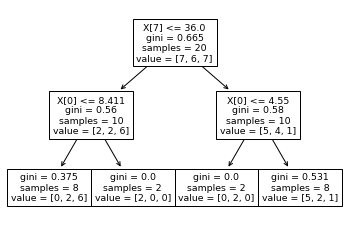

In [ ]:
MaxDepth=2
Tree= tree.DecisionTreeClassifier(max_depth=MaxDepth)

Tree.fit(Xtrain,Ytrain)


print("training results:")
TrainCorrect=0
for pred,real in zip(Tree.predict(Xtrain),Ytrain):
  if pred==real:
    TrainCorrect=TrainCorrect+1
print(TrainCorrect,"/",Xtrain.shape[0], " ",TrainCorrect/Xtrain.shape[0]*100,"%")

print("testing results")
TestCorrect=0

for pred,real in zip(Tree.predict(Xtest),Ytest):
  if pred==real:
    TestCorrect=TestCorrect+1
print(TestCorrect,"/",Xtest.shape[0], " ",TestCorrect/Xtest.shape[0]*100,"%")

tree.plot_tree(Tree)

Q2

1. a. When using the default parameters the training accuracy is 100% because the dataset is small and decision trees can mimic any function with enough depth\
b. With default parameters the test accuracy is 40% because there is no reason for the model to generalize when overfitting creates the best test performance, and the dataset is so small that there is very little cost to overfitting.

2. Restricting the depth makes the training accuracy lower, but increases the test accuracy a lot. This is expected because it stops the model from overfitting to the training set. The best value that I found was a depth of 2, when using the other default parameters.

3. As explained in a few previous questions, decision trees can perfectly model any function, including the noise of that function. This means that with unrestricted depth it will always overfit to the training data. Decreasing the max depth reduced the model complexity which decreased the varience.

4. when traced out the tree predicts that the given querry point is an apartment

1 nearest neighboors got 1.0 correct and accuracy of 20.0 %
2 nearest neighboors got 1.0 correct and accuracy of 20.0 %
3 nearest neighboors got 2.0 correct and accuracy of 40.0 %
4 nearest neighboors got 2.0 correct and accuracy of 40.0 %
5 nearest neighboors got 1.0 correct and accuracy of 20.0 %


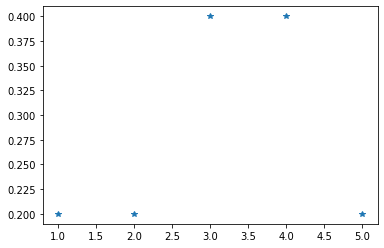

In [ ]:
#returns the k labels of the k nearest neighboors to the querry point,
#along with the distance to each point
def kNearNeigh(K,Querry,xData,yData):
  #print(Ytrain.shape)

  neighbDist=np.full((K),(np.finfo(np.float64).max))
  neighbCat=np.empty((K),dtype=object)
  for x,y in zip(xData,yData[:,0]):
    dist=np.linalg.norm(x-Querry)
    if dist<np.amax(neighbDist,0):
      neighbDist[np.argmax(neighbDist)]=dist
      #print(y)
      neighbCat[np.argmax(neighbDist)]=y

  return neighbCat, neighbDist

correctCounts=np.zeros((5))
for k in range(1,6):
  for querry,label in zip(Xtest,Ytest):
    nearest=kNearNeigh(k,querry,Xtrain,Ytrain)
    
    neighboors=defaultdict(lambda :0)
    for neigh in nearest[0]:
      neighboors[neigh]+=1

    max=0
    majority=''
    for neighboor,votes in neighboors.items():
      if(votes>max):
        max=votes
        majority=neighboor
      
    if majority== label:
      correctCounts[k-1]+=1

  print(k,'nearest neighboors got',correctCounts[k-1],'correct and accuracy of', correctCounts[k-1]/5*100, '%')

plt.plot(range(1,6),correctCounts/5,'*')

